In [84]:
import os, sys, glob, json, numpy as np, matplotlib.pyplot as plt, pandas as pd
import simplification.cutil as simpl

In [4]:
# Find filenames to plot
fnames = glob.glob('Z:\\behavior\\*\\croprot\\*dlc_position_orientation.npy')

# Exclude recordings from new rigs
fnames = [x for x in fnames if not ('RIG1' in x or 'RIG2' in x)]
fnames[0:3], len(fnames)

# Find recording information
fnamesRecordingInfo = [os.path.join(os.path.dirname(os.path.dirname(x)), 'recording.json') for x in fnames]

def loadJSON(x):
    if os.path.exists(x):
        with open(x, 'r') as f:
            return json.load(f)
    else:
        return None
    
recordingInfo = [loadJSON(x) for x in fnamesRecordingInfo]

# Exclude recordings that are incomplete or invalid
useRecording = [('stages' in ri and (isinstance(ri['stages']['radii'], list) or ri['stages']['radii'] > 0) and \
                 ri['web_complete'] and ri['tracking_successful']) for ri in recordingInfo]

fnames = [x for x, b in zip(fnames, useRecording) if b]
recordingInfo = [x for x, b in zip(recordingInfo, useRecording) if b]

In [32]:
recids = [i for i, ri in enumerate(recordingInfo) if isinstance(ri['stages']['spiral_cap'][0], list)]
recids

[3, 11]

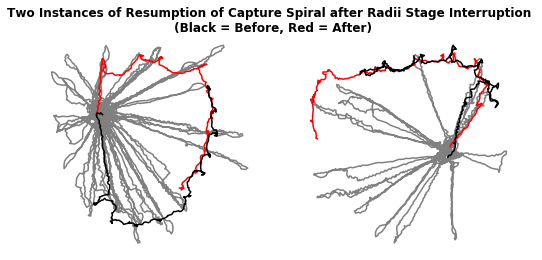

In [102]:
fig, ax = plt.subplots(1, 2, figsize=(8.5, 4))

recid = recids[0]
xy = np.load(fnames[recid])[:,0:2]
ri = recordingInfo[recid]

i0 = ri['stages']['spiral_cap'][1][-1]
i1 = ri['stages']['spiral_cap'][2][0]

xyA = pd.DataFrame(xy[(i0-10000):i0, :]).fillna(method='ffill').fillna(method='bfill').values
xyB = pd.DataFrame(xy[i0:i1, :]).fillna(method='ffill').fillna(method='bfill').values
xyC = pd.DataFrame(xy[i1:i1+10000, :]).fillna(method='ffill').fillna(method='bfill').values

resVW = 10
xyA = simpl.simplify_coords_vw(xyA.copy(), resVW)
xyB = simpl.simplify_coords_vw(xyB.copy(), resVW)
xyC = simpl.simplify_coords_vw(xyC.copy(), resVW)

ax[0].plot(xyA[:,0], xyA[:,1], color='black', zorder=10)
ax[0].plot(xyB[:,0], xyB[:,1], color='gray')
ax[0].plot(xyC[:,0], xyC[:,1], color='red')

ax[0].set_axis_off()

recid = recids[1]
xy = np.load(fnames[recid])[:,0:2]
ri = recordingInfo[recid]

i0 = ri['stages']['spiral_cap'][0][-1]
i1 = ri['stages']['spiral_cap'][1][0]

xyA = pd.DataFrame(xy[(i0-15000):i0, :]).fillna(method='ffill').fillna(method='bfill').values
xyB = pd.DataFrame(xy[i0:i1, :]).fillna(method='ffill').fillna(method='bfill').values
xyC = pd.DataFrame(xy[i1:i1+10000, :]).fillna(method='ffill').fillna(method='bfill').values

resVW = 10
xyA = simpl.simplify_coords_vw(xyA.copy(), resVW)
xyB = simpl.simplify_coords_vw(xyB.copy(), resVW)
xyC = simpl.simplify_coords_vw(xyC.copy(), resVW)

ax[1].plot(xyA[:,0], xyA[:,1], color='black', zorder=10)
ax[1].plot(xyB[:,0], xyB[:,1], color='gray')
ax[1].plot(xyC[:,0], xyC[:,1], color='red')

ax[1].set_axis_off()

fig.suptitle('Two Instances of Resumption of Capture Spiral after Radii Stage Interruption \n (Black = Before, Red = After)')

fig.savefig('C:/Users/acorver/Desktop/paper-figures/Fig_capturespiral_after_interrupt.pdf')